In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
p = []
ppath = '../txtfiles-5/'
p.append(pd.read_csv(ppath + 'p10.txt', sep=' ', header=0))
p.append(pd.read_csv(ppath + 'p20.txt', sep=' ', header=0))
p.append(pd.read_csv(ppath + 'p40.txt', sep=' ', header=0))
cases=len(p)
q = pd.read_csv('../txtfiles-6/plot_ene/p10_e.txt', sep=' ', header=0)

cols = ['m', 'ms', 'e', 'sp_h']

Plaquette of L = 10, 20, 40


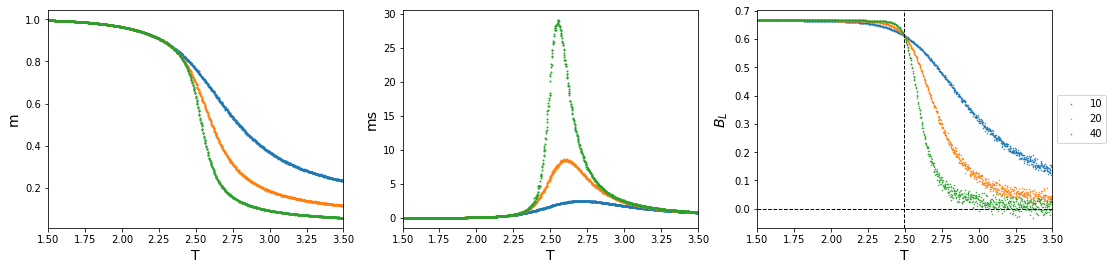

In [8]:
print("Plaquette of L = 10, 20, 40")
ax=[0,1,2]
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1, 3, figsize=(18, 4))
for j in range (2):
    for i in range (cases):
        ax[j].plot(p[i].temperature, p[i][cols[j]], 'o', markersize=1, label=2**i*10)
    ax[j].set_xlabel('T', fontsize=14)
    ax[j].set_ylabel(cols[j], fontsize=14)
    ax[j].set_xlim(1.5, 3.5)

T_c = 2.493
for i in range (cases):
    ax[2].plot(p[i].temperature, 1-p[i].m4/(3*p[i].m2**2), '.', markersize=1, label=2**i*10)
ax[2].axhline(y=0, color='k', linewidth=1, linestyle='--')
ax[2].axvline(x=T_c, color='k', linewidth=1, linestyle='--')
ax[2].set_xlim(1.5, 3.5)
ax[2].set_xlabel('T', fontsize=14)
ax[2].set_ylabel('$B_L$', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# I. plot All

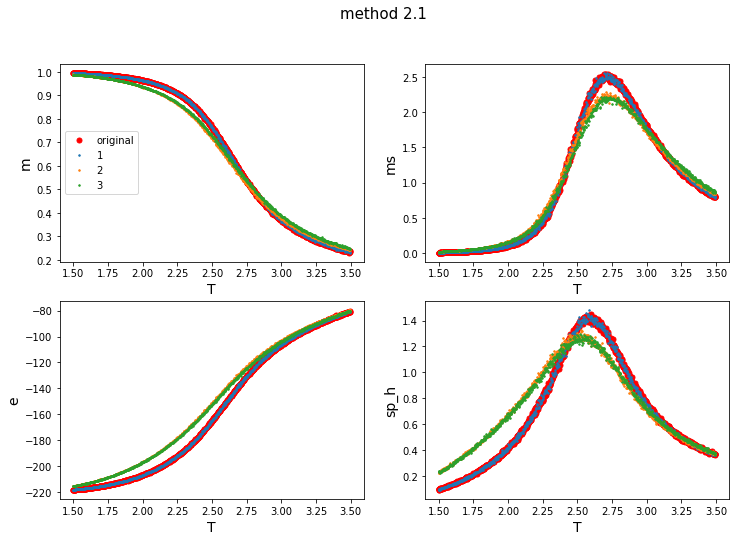

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
fit_path = '../txtfiles-6/plot_A/plot_' + 'srch'
fit = []
fit.append(pd.read_csv(fit_path + '_1_1.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_2_1.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_3_1.txt', sep = ' ', header = 1))
for j in range (4):
    ax[int(j/2), j%2].plot(p[0].temperature, p[0][cols[j]], 'r.', markersize = 10, markerfacecolor = None, linestyle = 'None', label = 'original')
    for i in range (len(fit)):
        ax[int(j/2), j%2].plot(fit[i].temperature[fit[i].temperature>=1.5], fit[i][cols[j]][fit[i].temperature>=1.5], '.', markersize = 3, label = i+1)
    ax[int(j/2), j%2].set_xlabel('T', fontsize=14)
    ax[int(j/2), j%2].set_ylabel(cols[j], fontsize=14)
ax[0,0].legend(loc='center left')
plt.suptitle('method 2.1', fontsize=15)
plt.show()

# II. plot Energy

3 : 0.997696360155469
1 : 0.9977622159345134


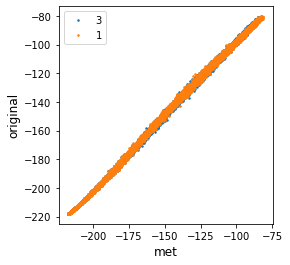

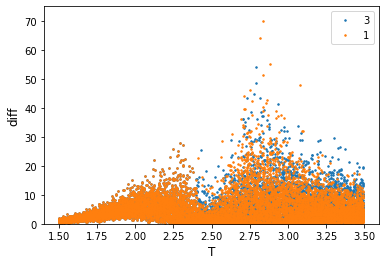

AttributeError: 'DataFrame' object has no attribute 'temperature'

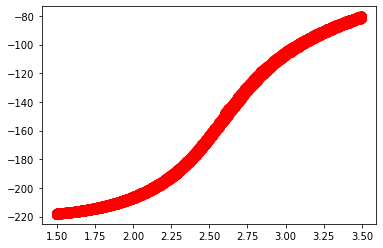

In [54]:
fit = []
labels = ['3', '1']
target = 'met' # met, eff, srch
fit_path = '../txtfiles-6/plot_ene/met/' + target
fit.append(pd.read_csv(fit_path + '_3_1024.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_1_1024.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_3_2048.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_1_2048.txt', sep = ' ', header = 1))
#fit.append(pd.read_csv(fit_path + '_1_4096.txt', sep = ' ', header = 1))
#fit.append(pd.read_csv(fit_path + '_3_4096.txt', sep = ' ', header = 1))

for i in range (int(len(fit)/2)): # 1024, 2048, 4096
    for j in range (len(labels)): # nnn nth = 1, 3
        R2 = 1 - np.sum((np.array(fit[2*i+j].e) - np.array(q.e))**2) / np.sum((fit[2*i+j].e - np.average(fit[2*i+j].e))**2)
        print(labels[j], ":", R2)
        plt.plot(fit[2*i+j].e, q.e, '.', markersize = 3, label = labels[j])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel(target, fontsize=12)
    plt.ylabel('original', fontsize=12)
    plt.legend()
    plt.show()

    for j in range (2):
        plt.plot(q.temp, (np.array(fit[2*i+j].e) - np.array(q.e))**2, '.', markersize = 3, label=labels[j])
    plt.ylim(0, 75)
    plt.xlabel('T', fontsize=12)
    plt.ylabel('diff', fontsize=12)
    plt.legend()
    plt.show()
    
    plt.plot(q.temp, q.e, 'r.', markersize = 20, markerfacecolor = None, label='org')
    for j in range (2):
        plt.plot(fit[2*i+j].temp, fit[2*i+j].e, '.', markersize = 3, label=labels[j])
    plt.xlabel('T', fontsize=12)
    plt.ylabel('diff', fontsize=12)
    plt.legend()
    plt.show()

3 : 0.966586965517033
1 : 0.9996268876183921
3 : 0.9691316899978449
1 : 0.9997928031923388
3 : 0.9712051149363949
1 : 0.9998775706675226


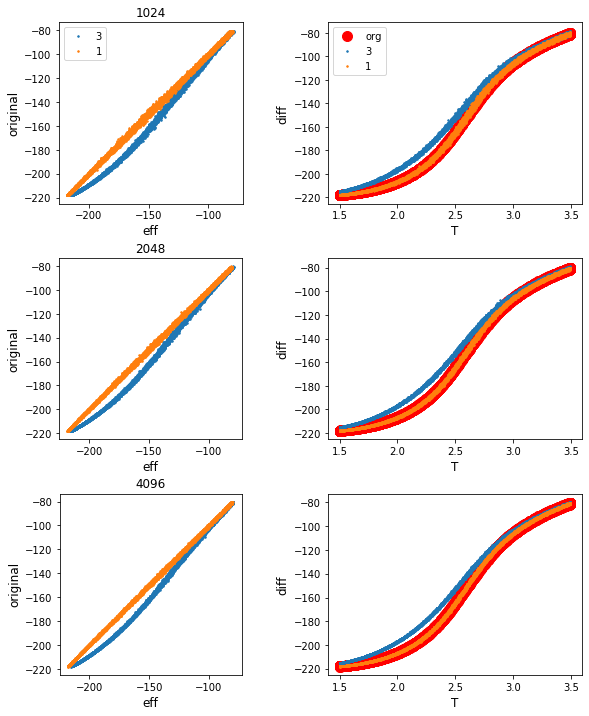

In [34]:
fig, ax = plt.subplots(3, 2, figsize=(10, 12))
fit = []
labels = ['3', '1']
titles = ['1024', '2048', '4096']
target = 'srch' # met, eff, srch
fit_path = '../txtfiles-6/plot_ene/' + target
fit.append(pd.read_csv(fit_path + '_3_1024.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_1_1024.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_3_2048.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_1_2048.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_3_4096.txt', sep = ' ', header = 1))
fit.append(pd.read_csv(fit_path + '_1_4096.txt', sep = ' ', header = 1))

for i in range (int(len(fit)/2)): # 1024, 2048, 4096
    for j in range (len(labels)): # nnn nth = 1, 3
        R2 = 1 - np.sum((np.array(fit[2*i+j].e) - np.array(q.e))**2) / np.sum((fit[2*i+j].e - np.average(fit[2*i+j].e))**2)
        print(labels[j], ":", R2)
        ax[i, 0].plot(fit[2*i+j].e, q.e, '.', markersize = 3, label = labels[j])
    ax[i, 0].set_aspect('equal', adjustable='box')
    ax[i, 0].set_xlabel('eff', fontsize=12)
    ax[i, 0].set_ylabel('original', fontsize=12)
    ax[i, 0].set_title(titles[i])
    
    ax[i, 1].plot(q.temp, q.e, 'r.', markersize = 20, markerfacecolor = None, label='org')
    for j in range (2):
        ax[i, 1].plot(fit[2*i+j].temperature, fit[2*i+j].e, '.', markersize = 3, label=labels[j])
    ax[i, 1].set_xlabel('T', fontsize=12)
    ax[i, 1].set_ylabel('diff', fontsize=12)
    plt.subplots_adjust(hspace=0.3)
ax[0,0].legend()
ax[0, 1].legend()
plt.show()